In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Feature Engineering

In [4]:
male = pd.get_dummies(data['sex'], drop_first=True)
data = pd.concat([data, male], axis=1)

In [5]:
male

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [6]:
smoker = pd.get_dummies(data['smoker'], drop_first = True)
data = pd.concat([data, smoker], axis=True)

In [7]:
data

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [8]:
data

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [9]:
data = data.rename(columns={'yes':'Smoker'})

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [11]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
data.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

In [14]:
data.head()

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [13]:
x = data.drop('charges', axis=1)
y = data['charges']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [53]:
x_train.shape

(802, 5)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [40]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [41]:
scaled_x_train

array([[-1.14521401,  0.88005473, -0.89913605,  0.98514769, -0.48749802],
       [ 0.16065561,  0.58927785, -0.89913605,  0.98514769, -0.48749802],
       [-0.12953764, -0.53996081, -0.04776992, -1.01507623, -0.48749802],
       ...,
       [ 1.2488803 ,  1.62517051, -0.89913605,  0.98514769, -0.48749802],
       [ 0.88613874,  0.58927785, -0.89913605,  0.98514769, -0.48749802],
       [ 0.59594549, -1.27764195, -0.89913605, -1.01507623, -0.48749802]])

## Support Vector Machine

In [42]:
from sklearn.svm import SVR

In [43]:
regressor = SVR(kernel='rbf')
regressor.fit(scaled_x_train, y_train)

SVR()

In [44]:
predict = regressor.predict(scaled_x_test)

In [54]:
predict

array([9167.32179972, 9152.3478116 , 9117.18454317, 9027.06555372,
       9159.19263803, 9032.06984547, 9094.92087102, 9149.74790819,
       9067.74189869, 9027.31048462, 9122.57711657, 9178.3887129 ,
       9159.03415155, 9062.12047748, 9168.69504038, 9090.46895283,
       9023.21164848, 9154.25315726, 9046.64552867, 9035.31173712,
       9037.7057341 , 9155.9531236 , 9062.94742182, 9089.24050746,
       9147.61882907, 9111.07687863, 9153.57113423, 9153.26468202,
       9076.30017408, 9037.45932028, 9148.97696925, 9025.54331689,
       9031.35951745, 9115.156179  , 9120.09381009, 9068.50115737,
       9162.5028941 , 9022.00927589, 9141.93095086, 9121.64358496,
       9044.04146746, 9145.97706183, 9034.27836057, 9020.52028795,
       9057.89231449, 9138.97898064, 9164.61210309, 9141.43832684,
       9159.94119268, 9045.34912483, 9117.81736007, 9151.75113079,
       9037.13645377, 9141.31178047, 9143.66980709, 9140.33580712,
       9173.83565093, 9039.71703682, 9126.40612691, 9071.57318

In [46]:
np.mean((y_test - predict)**2)

174215366.85691157

Text(0.5, 0, 'Predict')

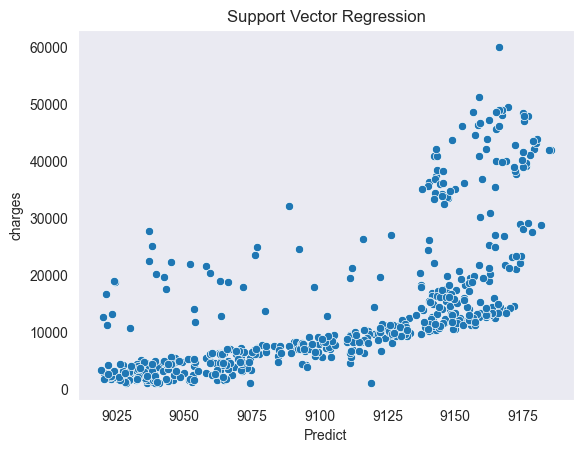

In [61]:
sns.set_style('dark')
f = sns.scatterplot(x=predict, y=y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')

## Retrying it without dropping the regions

In [52]:
data = pd.read_csv("insurance.csv")

In [53]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
region = pd.get_dummies(data["region"])

In [55]:
region.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [56]:
data = pd.concat([data, region], axis=1)

In [57]:
data.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0


In [58]:
Smoker = pd.get_dummies(data["smoker"], drop_first=True)
male = pd.get_dummies(data["sex"], drop_first=True)

In [59]:
data = pd.concat([data, Smoker], axis=1)
data = pd.concat([data, male], axis=1)

In [60]:
data.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,yes,male
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0,0,1


In [64]:
data.rename(columns = {"yes":"Smoker"}, inplace=True)

In [66]:
data = data.drop(["sex", "smoker", "region"], axis=1)

In [67]:
data

,age,bmi,children,charges,northeast,northwest,southeast,southwest,Smoker,male
0,19,27.900,0,16884.92400,0,0,0,1,1,0
1,18,33.770,1,1725.55230,0,0,1,0,0,1
2,28,33.000,3,4449.46200,0,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,0,0,1
4,32,28.880,0,3866.85520,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,0,0,1
1334,18,31.920,0,2205.98080,1,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,0,0


In [69]:
x = data.drop(["charges"], axis=1)
y = data["charges"]

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

# Support Vector Regression

In [75]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(scaled_x_train, y_train)
predict = regressor.predict(scaled_x_test)

In [76]:
loss = np.mean((predict-y_test)**2)

In [77]:
loss

170591572.13090008